In [1]:
import sys
if '/home/rossco/immunova' not in sys.path:
    sys.path.append('/home/rossco/immunova')
from immunova.data.mongo_setup import pd_init
from immunova.data.fcs_experiments import FCSExperiment
from immunova.flow.gating.actions import Gating, Template
from immunova.flow.gating.defaults import ChildPopulationCollection
from warnings import filterwarnings
from tqdm import tqdm_notebook
import matplotlib
import pandas as pd
import os
filterwarnings('ignore')
pd_init()

/home/rossco/immunova/env/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/rossco/immunova/env/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
texp = FCSExperiment.objects(experiment_id='PD_T_PBMCs').get()

In [3]:
t = Template(texp, '318-01_pbmc_t', include_controls=False)

In [17]:
t.load_template('PBMCt_Preprocessing')

True

Applying boundary...
------ boundary ------
New population: cells
...proportion of total events: 0.813
...proportion of parent: 0.813
New population: debris
...proportion of total events: 0.187
...proportion of parent: 0.187
-----------------------
Applying CD3_gate...
------ CD3_gate ------
New population: CD3+
...proportion of total events: 0.170
...proportion of parent: 0.209
New population: CD3-
...proportion of total events: 0.643
...proportion of parent: 0.791
-----------------------
Applying live_gate...
------ live_gate ------
New population: dead
...proportion of total events: 0.153
...proportion of parent: 0.901
New population: live
...proportion of total events: 0.017
...proportion of parent: 0.099
-----------------------
Applying singlets1_gate...
------ singlets1_gate ------
New population: singlets1
...proportion of total events: 0.015
...proportion of parent: 0.872
New population: doublets1
...proportion of total events: 0.002
...proportion of parent: 0.128
-------------

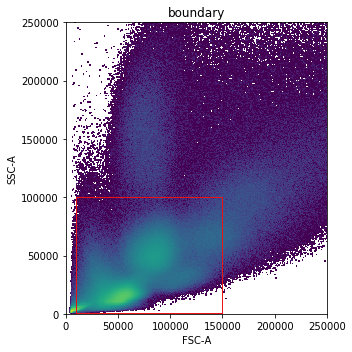

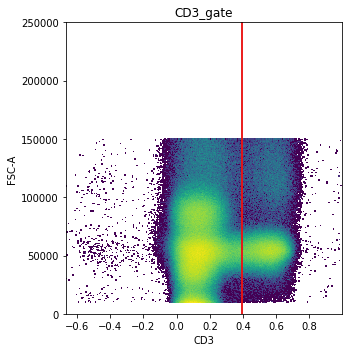

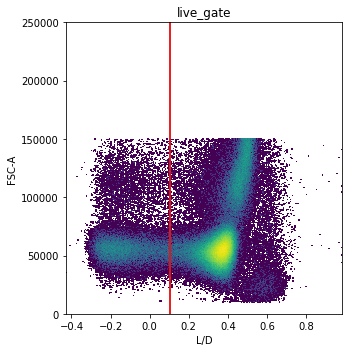

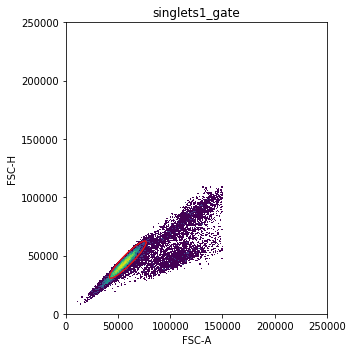

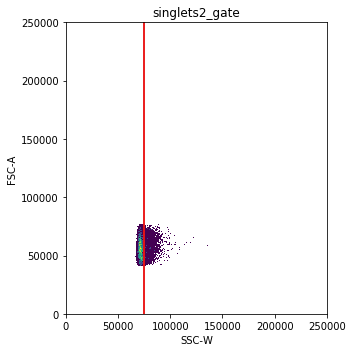

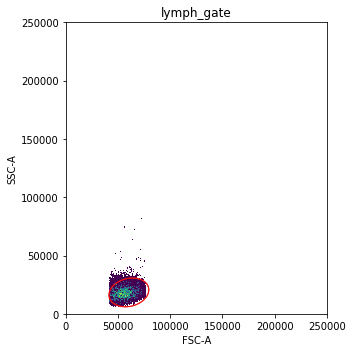

In [5]:
t.apply_many(apply_all=True, plot_outcome=True)

Live gate needs correcting.

In [6]:
live_geom = t.populations['live'].geom

In [7]:
live_geom

{'method': 'Local minima between pair of highest peaks',
 'threshold': 0.1044089667213553,
 'shape': 'threshold',
 'x': 'L/D',
 'y': None}

In [8]:
live_geom['threshold'] = 0.5

In [12]:
new_geoms = {'live': live_geom, 'dead': live_geom}
t.edit_gate('live_gate', updated_geom=new_geoms)

Editing gate: live_gate
Updating dead
Updating live
The following gates are downstream of live_gate and will need to be applied again: ['singlets1_gate', 'singlets2_gate', 'lymph_gate']
Edit complete!


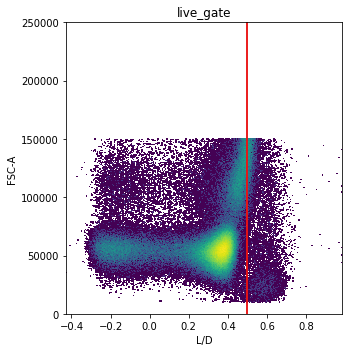

In [13]:
t.plotting.plot_gate('live_gate')

------ singlets1_gate ------
New population: singlets1
...proportion of total events: 0.126
...proportion of parent: 0.824
New population: doublets1
...proportion of total events: 0.027
...proportion of parent: 0.176
-----------------------


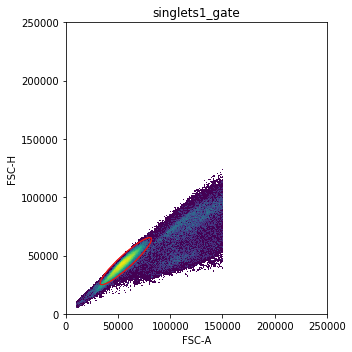

In [24]:
t.apply('singlets1_gate', k=4, conf=0.999)

------ singlets2_gate ------
New population: doublets2
...proportion of total events: 0.006
...proportion of parent: 0.048
New population: single_Live_CD3+
...proportion of total events: 0.120
...proportion of parent: 0.952
-----------------------


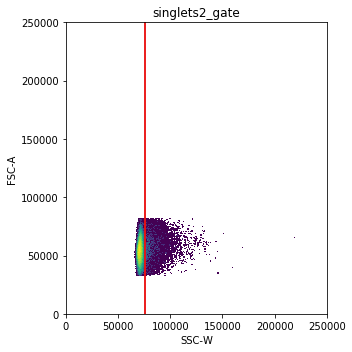

In [25]:
t.apply('singlets2_gate')

In [ ]:
t.apply

In [18]:
t.save(overwrite=True)

Saved successfully!


True